## Objective

Objective of this case study is to predict count of bikes that could be rented on daily basis based on environmental and seasonal settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Importing data
bikedata = pd.read_csv("C://Users//Shubhada//Desktop//Upgrad//PGP_AIML//Course 3- Regression//Multiple Regression Bike Sharing Assignment//day.csv")

In [3]:
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikedata.shape

(730, 16)

In [5]:
bikedata.info()
#we can see there are no null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#check numerical variables
bikedata.describe()
#we can see many of the variables below need typecasting, they are not supposed to be numerical variables

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#removing dplicates and checking shape before and after
print('Shape before dedupe:', bikedata.shape)
bikedata= bikedata.drop_duplicates()
print('Shape after dedupe:', bikedata.shape)

Shape before dedupe: (730, 16)
Shape after dedupe: (730, 16)


we can see there are no duplicates, since no of columns before and after dedupe is same

#### Rename the columns for better interpretation

In [8]:
bikedata.rename(columns={'instant':'record_index','dteday':'date','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)

In [9]:
bikedata.head()

,record_index,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
#checking datatypes
bikedata.dtypes

record_index           int64
date                  object
season                 int64
year                   int64
month                  int64
holiday                int64
weekday                int64
workingday             int64
weather_condition      int64
temp                 float64
atemp                float64
humidity             float64
windspeed            float64
casual                 int64
registered             int64
total_count            int64
dtype: object

#### Converting numerical variables to categorical variables wherever necessary

#### Dealing with categorical Columns

In [11]:
#from above datatypes, we can see many variables need typecasting
bikedata['date']=pd.to_datetime(bikedata.date)
bikedata['season']=bikedata.season.astype('category')
bikedata['year']=bikedata.year.astype('category')
bikedata['month']=bikedata.month.astype('category')
bikedata['holiday']=bikedata.holiday.astype('category')
bikedata['weekday']=bikedata.weekday.astype('category')
bikedata['workingday']=bikedata.workingday.astype('category')
bikedata['weather_condition']=bikedata.weather_condition.astype('category')

In [12]:
#lets summarise the dataset again to see remaining numeric columns
bikedata.describe()

,record_index,temp,atemp,humidity,windspeed,casual,registered,total_count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### lets replace values in few columns, wherever required to convert them into dummies in later stages

In [13]:
# converting feature values to categorical values
bikedata['season'] = bikedata['season'].replace([1,2,3,4],['spring','summer','fall', 'winter'])
bikedata['month'] = bikedata['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],
                                              ['jan','feb','march', 'april','may','jun','jul','aug','sep','oct','nov','dec'])
bikedata['weekday'] = bikedata['weekday'].replace([0,1,2,3,4,5,6],['sun','mon','tues','wed','thurs','fri','sat'])
bikedata['weather_condition'] = bikedata['weather_condition'].replace([1,2,3,4],['clear','cloudy','light rain', 'heavy rain'])
bikedata['year'] = bikedata['year'].replace([0,1],['2018','2019'])
bikedata['workingday'] = bikedata['workingday'].replace([0,1],['non working day','working day'])
bikedata['holiday'] = bikedata['holiday'].replace([0,1],['holiday_0','holiday_1'])

In [14]:
bikedata.head(5)

,record_index,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2018-01-01,spring,2018,jan,holiday_0,sat,non working day,cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,2018,jan,holiday_0,sun,non working day,cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,2018,jan,holiday_0,mon,working day,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,2018,jan,holiday_0,tues,working day,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,2018,jan,holiday_0,wed,working day,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Visualising categorical data

In [15]:
#lets remove some columns which won't be useful to us in later stages
#columns to be removed: record_index, date (since we havev seperate month and year columns, date will not be that useful)
#removing casuak and registered since we are interested in total count
bikedata = bikedata.drop(columns=['record_index','date', 'casual', 'registered'])

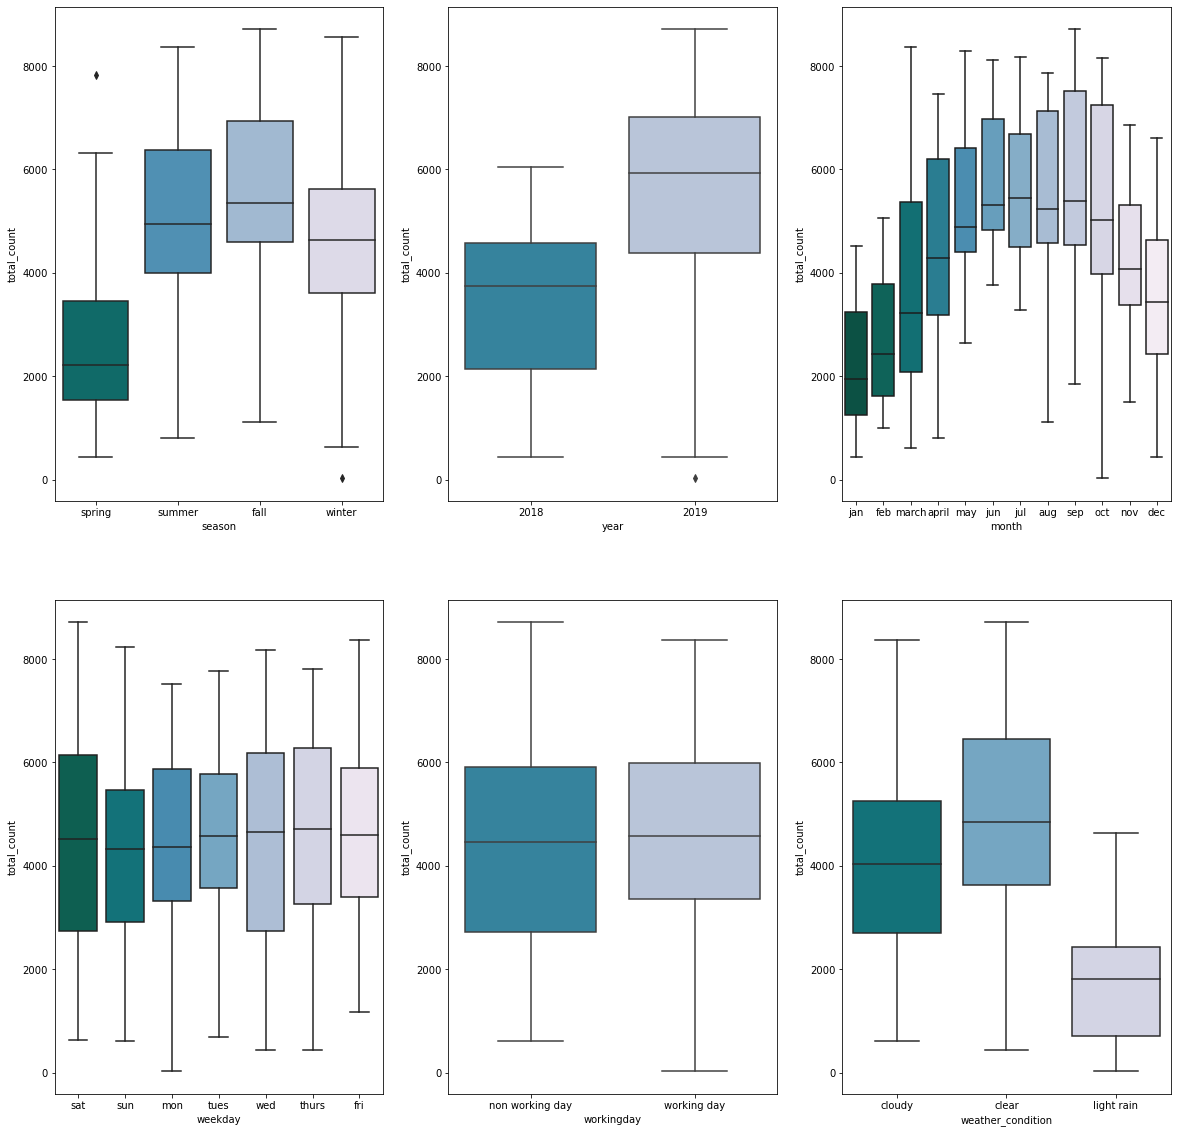

In [16]:
#visualizing categorical variables VS cnt using boxplots

plt.figure(figsize=(20,20))
plt.subplot(2,3,1)
sns.boxplot(x='season', y='total_count',data=bikedata, palette="PuBuGn_r")

plt.subplot(2,3,2)
sns.boxplot(x='year', y='total_count',data=bikedata,palette="PuBuGn_r" )

plt.subplot(2,3,3)
sns.boxplot(x='month', y='total_count',data=bikedata, palette="PuBuGn_r")

plt.subplot(2,3,4)
sns.boxplot(x='weekday', y='total_count',data=bikedata, palette="PuBuGn_r")

plt.subplot(2,3,5)
sns.boxplot(x='workingday', y='total_count',data=bikedata, palette="PuBuGn_r")

plt.subplot(2,3,6)
sns.boxplot(x='weather_condition', y='total_count',data=bikedata, palette="PuBuGn_r")

plt.show()

We can see howtotal count is higher in summer & fall, high in august, sept & oct and comparatively higher when the weather is clear

### Visualising numerical columns

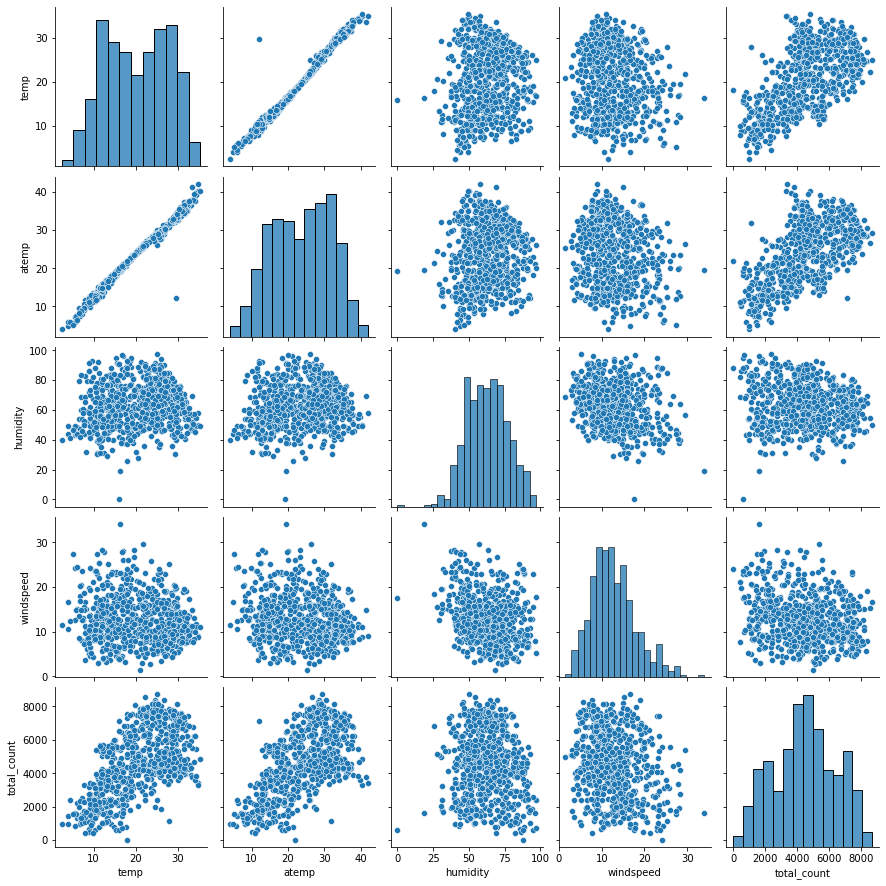

In [17]:
#visualising the dataset
#pairplot is used to visualise numerical variables
sns.pairplot(bikedata)
plt.show()

In [18]:
#we can see a very high correlation between temp and atemp variables
#lets do VIF to drop one of these variables
# Dropping atemp column as it is highly correlated to ‘temp’ column
bikedata = bikedata.drop('atemp',axis=1)

In [19]:
#Creating dummy variables wherever required and concatenating them
#we are dropping first dummy of each variable in order to reduce number of dummies
season = pd.get_dummies(bikedata['season'], drop_first = True)
season.head()
year = pd.get_dummies(bikedata['year'], drop_first = True)
year.head()
month = pd.get_dummies(bikedata['month'], drop_first = True)
month.head()
weekday = pd.get_dummies(bikedata['weekday'], drop_first = True)
weekday.head()
workingday = pd.get_dummies(bikedata['workingday'], drop_first = True)
workingday.head()
weather_condition = pd.get_dummies(bikedata['weather_condition'], drop_first = True)
weather_condition.head()
holiday = pd.get_dummies(bikedata['holiday'], drop_first = True)
holiday.head()
# print(season.head(),year.head(),month.head(),weekday.head(),workingday.head(),weather_condition.head())

,holiday_1
0,0
1,0
2,0
3,0
4,0


In [20]:
#adding all of the above dummies to original dataset
bikedata = pd.concat([bikedata,season,month,holiday,weekday,workingday,weather_condition], axis = 1)

In [21]:
bikedata.head()

,season,year,month,holiday,weekday,workingday,weather_condition,temp,humidity,windspeed,total_count,spring,summer,winter,aug,dec,feb,jan,jul,jun,march,may,nov,oct,sep,holiday_1,mon,sat,sun,thurs,tues,wed,working day,cloudy,light rain
0,spring,2018,jan,holiday_0,sat,non working day,cloudy,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,spring,2018,jan,holiday_0,sun,non working day,cloudy,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,spring,2018,jan,holiday_0,mon,working day,clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,spring,2018,jan,holiday_0,tues,working day,clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,spring,2018,jan,holiday_0,wed,working day,clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [22]:
#dropping columns for which we have created dummies
bikedata.drop(['season','year','month','holiday','weekday','workingday','weather_condition'], axis = 1, inplace = True)
bikedata.head()

,temp,humidity,windspeed,total_count,spring,summer,winter,aug,dec,feb,jan,jul,jun,march,may,nov,oct,sep,holiday_1,mon,sat,sun,thurs,tues,wed,working day,cloudy,light rain
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


### Model building

In [23]:
#splitting the dataset into training and test dataset
from sklearn.model_selection import train_test_split

bikedata_train, bikedata_test = train_test_split(bikedata, train_size = 0.7, test_size = 0.3, random_state = 100)
print(bikedata_train.shape, bikedata_test.shape)

(510, 28) (219, 28)


In [24]:
bikedata_train.head()

,temp,humidity,windspeed,total_count,spring,summer,winter,aug,dec,feb,jan,jul,jun,march,may,nov,oct,sep,holiday_1,mon,sat,sun,thurs,tues,wed,working day,cloudy,light rain
653,19.201653,55.8333,12.208807,7534,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
576,29.246653,70.4167,11.083475,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
426,16.980847,62.1250,10.792293,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
728,10.489153,48.3333,23.500518,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
482,15.443347,48.9583,8.708325,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [25]:
bikedata_test.head()

,temp,humidity,windspeed,total_count,spring,summer,winter,aug,dec,feb,jan,jul,jun,march,may,nov,oct,sep,holiday_1,mon,sat,sun,thurs,tues,wed,working day,cloudy,light rain
184,29.793347,63.7917,5.459106,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
535,32.082500,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
299,19.270000,81.2917,13.250121,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0
221,31.433347,42.4167,13.417286,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
152,29.315000,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


### Scaling features

Lets use min-max scalar for scaling

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

In [28]:
# Apply scaler() to all the columns except the dummy variables
num_vars = ['temp', 'humidity', 'windspeed','total_count']

bikedata_train[num_vars] = scaler.fit_transform(bikedata_train[num_vars])

In [29]:
bikedata_train.head()

,temp,humidity,windspeed,total_count,spring,summer,winter,aug,dec,feb,jan,jul,jun,march,may,nov,oct,sep,holiday_1,mon,sat,sun,thurs,tues,wed,working day,cloudy,light rain
653,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
576,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
426,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
728,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
482,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


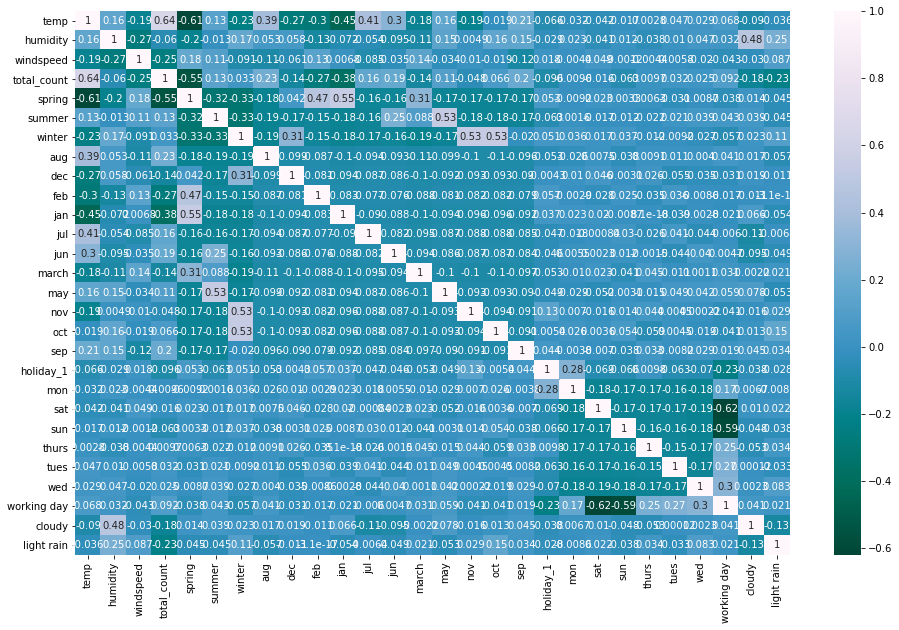

In [30]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(bikedata_train.corr(), annot = True, cmap="PuBuGn_r")
plt.show()

### Diving the dataset into X and y for model building

In [31]:
y_train = bikedata_train.pop('total_count')
X_train = bikedata_train

### Building model using RFE
RFE Recursive Feature Eliination

In [32]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [33]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 16)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [34]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 2),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 3),
 ('dec', True, 1),
 ('feb', False, 7),
 ('jan', False, 6),
 ('jul', True, 1),
 ('jun', True, 1),
 ('march', False, 11),
 ('may', True, 1),
 ('nov', True, 1),
 ('oct', False, 4),
 ('sep', True, 1),
 ('holiday_1', True, 1),
 ('mon', False, 10),
 ('sat', True, 1),
 ('sun', False, 9),
 ('thurs', False, 8),
 ('tues', False, 5),
 ('wed', False, 12),
 ('working day', True, 1),
 ('cloudy', True, 1),
 ('light rain', True, 1)]

In [35]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'humidity', 'windspeed', 'summer', 'winter', 'dec', 'jul',
       'jun', 'may', 'nov', 'sep', 'holiday_1', 'sat', 'working day', 'cloudy',
       'light rain'],
      dtype='object')

In [36]:
X_train.columns[~rfe.support_]

Index(['spring', 'aug', 'feb', 'jan', 'march', 'oct', 'mon', 'sun', 'thurs',
       'tues', 'wed'],
      dtype='object')

#### Building a model using statsmodel using deailed statistics

# Model1

In [37]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [38]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [39]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [40]:
#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     46.04
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           5.00e-87
Time:                        21:47:56   Log-Likelihood:                 271.57
No. Observations:                 510   AIC:                            -509.1
Df Residuals:                     493   BIC:                            -437.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3293      0.046      7.107      

In [41]:
# Calculate the VIFs again for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.45
1,temp,2.03
5,winter,1.98
2,humidity,1.94
14,working day,1.88
4,summer,1.84
13,sat,1.79
10,nov,1.67
9,may,1.66
7,jul,1.57


#### looking at p values and VIF above, except for constant all features in selected model are signifcant, since value of p is less than 0.05 for all and value of VIF is <5 for all

#### if we drop constant then it will be uncentered model, so we are goinhg to keep it

# Model2

In [42]:
 X_train_lm = X_train_rfe.drop('const', 1)

In [43]:
# # Adding a constant variable 
# import statsmodels.api as sm  
# X_train_lm = sm.add_constant(X_train_rfe)

In [44]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [45]:
#summary of our linear model
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:            total_count   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              405.0
Date:                Wed, 15 Jun 2022   Prob (F-statistic):                   7.63e-272
Time:                        21:47:57   Log-Likelihood:                          246.69
No. Observations:                 510   AIC:                                     -461.4
Df Residuals:                     494   BIC:                                     -393.6
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [46]:
# Calculate the VIFs again for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,humidity,17.98
0,temp,12.91
13,working day,5.04
2,windspeed,3.88
4,winter,2.64
3,summer,2.42
14,cloudy,2.13
12,sat,1.91
9,nov,1.81
8,may,1.78


# Model3

In [47]:
X_train_lm2 = X_train_lm.drop('humidity', 1)
lm2 = sm.OLS(y_train,X_train_lm2).fit()   # Running the linear model
print(lm2.summary())

# Calculate the VIFs again for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                                 OLS Regression Results                                
Dep. Variable:            total_count   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              432.4
Date:                Wed, 15 Jun 2022   Prob (F-statistic):                   4.64e-273
Time:                        21:47:57   Log-Likelihood:                          246.43
No. Observations:                 510   AIC:                                     -462.9
Df Residuals:                     495   BIC:                                     -399.4
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

,Features,VIF
0,temp,7.64
12,working day,4.49
1,windspeed,3.67
3,winter,2.53
2,summer,2.41
8,nov,1.81
11,sat,1.81
7,may,1.78
5,jul,1.66
13,cloudy,1.56


# Model4

In [48]:
X_train_lm3 = X_train_lm2.drop('dec', 1)
lm3 = sm.OLS(y_train,X_train_lm3).fit()   # Running the linear model
print(lm3.summary())

# Calculate the VIFs again for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_lm3.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm3.values, i) for i in range(X_train_lm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                                 OLS Regression Results                                
Dep. Variable:            total_count   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              464.2
Date:                Wed, 15 Jun 2022   Prob (F-statistic):                   2.11e-274
Time:                        21:47:57   Log-Likelihood:                          246.43
No. Observations:                 510   AIC:                                     -464.9
Df Residuals:                     496   BIC:                                     -405.6
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

,Features,VIF
0,temp,7.52
11,working day,4.39
1,windspeed,3.66
2,summer,2.40
3,winter,2.06
6,may,1.78
10,sat,1.77
4,jul,1.66
7,nov,1.58
12,cloudy,1.56


# Model5

In [49]:
X_train_lm4 = X_train_lm3.drop('temp', 1)
lm4 = sm.OLS(y_train,X_train_lm4).fit()   # Running the linear model
print(lm4.summary())

# Calculate the VIFs again for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_lm4.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm4.values, i) for i in range(X_train_lm4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                                 OLS Regression Results                                
Dep. Variable:            total_count   R-squared (uncentered):                   0.840
Model:                            OLS   Adj. R-squared (uncentered):              0.836
Method:                 Least Squares   F-statistic:                              200.7
Date:                Wed, 15 Jun 2022   Prob (F-statistic):                   3.50e-188
Time:                        21:47:57   Log-Likelihood:                          38.938
No. Observations:                 510   AIC:                                     -51.88
Df Residuals:                     497   BIC:                                      3.172
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

,Features,VIF
0,windspeed,3.34
10,working day,3.32
1,summer,2.37
2,winter,1.98
5,may,1.67
6,nov,1.58
9,sat,1.58
11,cloudy,1.55
4,jun,1.26
3,jul,1.14


# Model6

In [50]:
X_train_lm5 = X_train_lm4.drop('nov', 1)
lm5 = sm.OLS(y_train,X_train_lm5).fit()   # Running the linear model
print(lm5.summary())

# Calculate the VIFs again for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_lm5.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm5.values, i) for i in range(X_train_lm5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                                 OLS Regression Results                                
Dep. Variable:            total_count   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.836
Method:                 Least Squares   F-statistic:                              217.0
Date:                Wed, 15 Jun 2022   Prob (F-statistic):                   5.32e-189
Time:                        21:47:57   Log-Likelihood:                          38.086
No. Observations:                 510   AIC:                                     -52.17
Df Residuals:                     498   BIC:                                     -1.359
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

,Features,VIF
0,windspeed,3.32
9,working day,3.32
1,summer,2.37
5,may,1.67
8,sat,1.58
10,cloudy,1.55
2,winter,1.46
4,jun,1.26
3,jul,1.14
6,sep,1.13


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

Lets check if the errors terms are normally distributed, this is one of the major asuumptions of linear regression

In [51]:
y_train_p= lm5.predict(X_train_lm5)

In [52]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

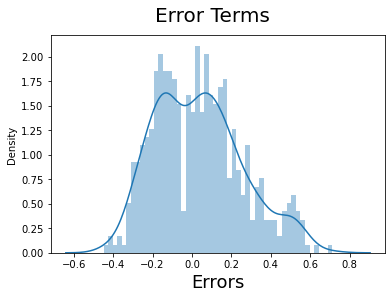

In [53]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_p), bins = 50)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label                   # X-label

## Making Predictions

In [54]:
### Applying scaling on the test set
num_vars = ['temp', 'humidity', 'windspeed','total_count']
bikedata_test[num_vars] = scaler.transform(bikedata_test[num_vars])

In [55]:
y_test = bikedata_test.pop('total_count')
X_test = bikedata_test

In [56]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_lm5.columns]

# # Adding a constant variable 
# X_test_new = sm.add_constant(X_test_new)

In [57]:
# Making predictions
y_pred = lm5.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

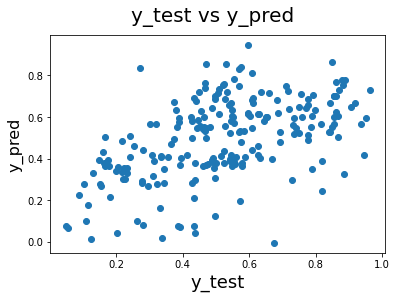

In [58]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)      